In [1]:
#Variables en http://datos.imss.gob.mx/sites/default/files/2022_Nov_ENCal_Variables.xlsx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('http://datos.imss.gob.mx/sites/default/files/2022_Nov_ENCal_Nacional.csv')
df.head()

,Folio,deleg,unidmed,id_unid,fecha_d,fecha_m,fecha_a,hr_ini_h,hr_ini_m,hr_fin_h,...,id_unidad,Unidad,Cve_Delegación,Delegación,Promedio_Diario2021,estrato,MOSCondia,FE_FinalNR,fecha,entidad
0,1,1,UMF 10 Aguascalientes,3,31,10,2022,8,25,8,...,3,UMF 10 Aguascalientes,1,Aguascalientes,1248,1,0.209115,45.431635,2022-10-31,1
1,4,1,UMF 10 Aguascalientes,3,31,10,2022,8,59,9,...,3,UMF 10 Aguascalientes,1,Aguascalientes,1248,1,0.209115,43.529844,2022-10-31,1
2,6,1,UMF 10 Aguascalientes,3,31,10,2022,8,38,8,...,3,UMF 10 Aguascalientes,1,Aguascalientes,1248,1,0.209115,39.005015,2022-10-31,1
3,9,1,UMF 10 Aguascalientes,3,31,10,2022,8,30,8,...,3,UMF 10 Aguascalientes,1,Aguascalientes,1248,1,0.209115,43.529844,2022-10-31,1
4,10,1,UMF 10 Aguascalientes,3,31,10,2022,8,45,8,...,3,UMF 10 Aguascalientes,1,Aguascalientes,1248,1,0.209115,39.005015,2022-10-31,1


## Preparación de datos

In [3]:
def espacios_a_nulos(obs):
    if isinstance(obs, str):
        obs = obs.strip()  
        if obs == "":
            return None
    return obs

df = df.applymap(espacios_a_nulos)

In [4]:
df.probsal = pd.to_numeric(df.probsal, errors='coerce', downcast='integer')
df.probsal = df.probsal.fillna(0).astype(int).replace(0, None)

In [5]:
df.probsal.unique()

array([11, 9, 7, 5, 31, 41, 6, 16, 1, 82, 999, 50, 15, 25, 13, 45, 4, 51,
       24, 37, 64, 32, 34, 21, 33, 3, 60, 18, 55, 10, 23, 49, 20, 26, 35,
       17, 22, 44, 58, 14, 12, 57, 40, 73, 54, 27, 43, 62, 19, 29, 38, 2,
       30, 59, 36, 66, 65, 63, 39, 28, 61, 42, 47, 70, 83, 77, 8, 998, 71,
       46, 67, 69, 74, 72, 80, 52, 75, 76, 81, 68, 78, 79, 48, None],
      dtype=object)

In [6]:
probsal_dict = {
    1 : 'Embarazo',
    2 : 'Seguimiento post parto o cesárea (Puerperio)',
    3 : 'Enfermedades del corazón',
    4 : 'Diabetes mellitus o pie diabético',
    5 : 'Infecciones respiratorias agudas',
    6 : 'Traumatismos y envenenamientos',
    7 : 'Control, supervisión o seguimiento de personas sanas',
    8 : 'Control o seguimiento del niño sano',
    9 : 'Artropatías',
    10 : 'Trastornos mentales y del comportamiento',
    11 :    'Dorsopatías',
    12 :    'Enfermedades de la piel y del tejido subcutáneo',
    13 :   'Enfermedades Infecciosas Intestinales',
    14 :    'Trastornos del metabolismo de las lipoproteínas y otras lipidemias',
    15 :    'Trastornos de los tejidos blandos',
    16 :    'Rinitis, rinofaringitis y faringitis crónicas',
    17 :    'Epilepsia',
    18 :    'Infección de las vías urinarias',
    19 :    'Bronquitis crónica y la no especificada, enfisema y asma',
    20 :    'Gastritis y duodenitis',
    21 :    'Enfermedades de la glándula tiroides',
    22 :    'Síndrome del colon irritable y otros trastornos funcionales del intestino',
    23 :    'Desvanecimiento o desmayo repentino',
    24 :    'Presencia de astenia o adinamia',
    25 :    'Control de peso u obesidad',
    26 :    'Accidente',
    27 :    'Alergia',
    28 :    'Anemia',
    29 :    'Nutrición',
    30 :    'Cáncer/Tumor/quiste',
    31 :    'Problemas oculares',
    32 :    'Análisis/ Estudios/ Laboratorio/Rayos X',
    33 :    'Problemas dentales',
    34 :    'Hipertensión',
    35 :    'Dolor de cabeza/migraña',
    36 :    'Autismo',
    37 :    'Vacunación',
    38 :    'Vesícula',
    39 :    'Ginecología y obstetricia',
    40 :    'Dolencias generales',
    41 :    'Incapacidad',
    42 :    'Dengue',
    43 :    'Diálisis',
    44 :    'Cirugía',
    45 :    'Hernia',
    46 :    'Hepatitis',
    47 :    'Apnea del sueño',
    48 :    'Apendicitis',
    49 :    'Papanicolao',
    50 :    'Medicamentos/ Farmacia',
    51 :    'Enfermedades crónicas',
    52 :    'Parálisis',
    54 :    'Lupus',
    55 :    'Fiebre/Mareos y vómito',
    57 :    'Problemas relacionados con la sangre',
    58 :    'Infecciones de cualquier tipo',
    59 :    'Planificación familiar',
    60 :    'Próstata',
    61 :    'Pediatra',
    62 :    'Problemas cerebrales',
    63 :    'Discapacidad',
    64 :    'Otorrinolaringólogo',
    65 :    'Problemas pulmonares',
    66 :    'Estrés/ tensión nerviosa',
    67 :    'Enfermedades del hígado',
    68 :    'Revisión y resultados',
    69 :    'Triglicéridos altos',
    70 :    'Cirrosis',
    71 :    'Amputación',
    72 :    'Problemas hormonales',
    73 :    'Tuberculosis',
    74 :    'Úlceras',
    75 :    'Vértigo',
    76 :    'Problema relacionado al sistema inmunológico',
    77 :    'Síndromes',
    78 :    'Herpes',
    79 :    'Problemas que dañan al Sistema Nervioso Central',
    80 :    'Problemas en las cervicales',
    81 :    'Quemaduras',
    82 :    'Ultrasonido',
    83 :    'Fisioterapia/Rehabilitación',
    998 :  'Otro'
}
df['probsal']=df['probsal'].replace(probsal_dict)

## Problemas de salud de la población

Text(0.5, 1.0, '10 afecciones más comúnes atendidas en el IMSS (Noviembre 2022)')

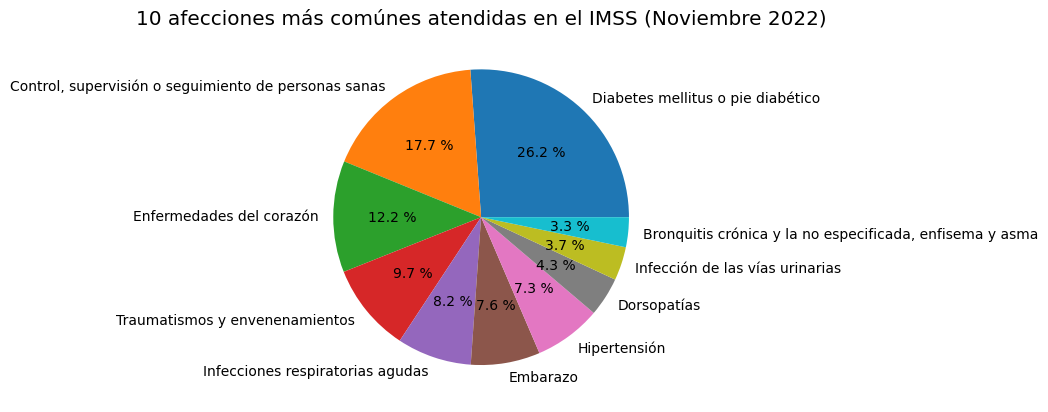

In [7]:
df_probsal=df[df['probsal']!=999]
y=df_probsal['probsal'].value_counts().head(10)
plt.pie(y, labels = y.index, autopct="%0.1f %%")
plt.style.use('ggplot')
plt.title('10 afecciones más comúnes atendidas en el IMSS (Noviembre 2022)')

Text(0.5, 0, 'No. de Pacientes')

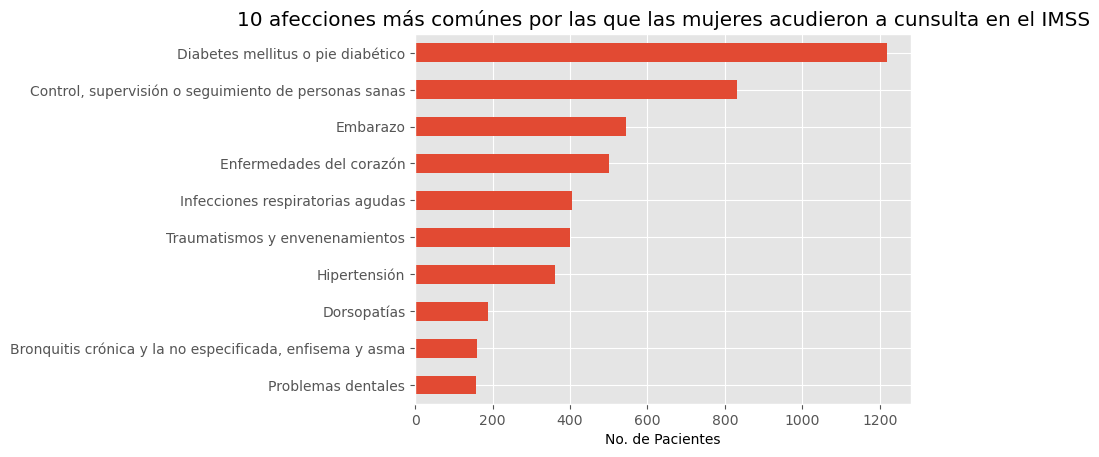

In [9]:
df_sexo_probsal = df[['sexo','probsal']]
df_sexo_probsal = df_sexo_probsal[(df_sexo_probsal['sexo']==1)&(df_sexo_probsal['probsal']!=999)].probsal.value_counts().head(10)
df_sexo_probsal.plot.barh().invert_yaxis()
plt.style.use("ggplot")
plt.title('10 afecciones más comúnes por las que las mujeres acudieron a cunsulta en el IMSS')
plt.xlabel('No. de Pacientes')

Text(0.5, 0, 'No. de Pacientes')

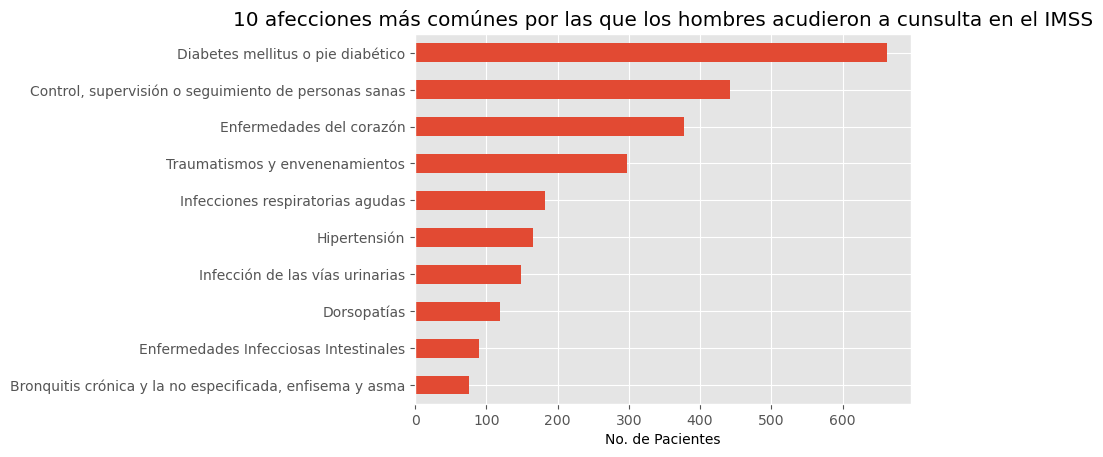

In [10]:
df_sexo_probsal = df[['sexo','probsal']]
df_sexo_probsal[(df_sexo_probsal['sexo']==2)&(df_sexo_probsal['probsal']!=999)].probsal.value_counts().head(10).plot.barh().invert_yaxis()
plt.style.use("ggplot")   
plt.title('10 afecciones más comúnes por las que los hombres acudieron a cunsulta en el IMSS')
plt.xlabel('No. de Pacientes')

## Estudios de laboratorio e imagenología

El tiempo de espera para estudios de imagenología es menor que para estudios de laboratorio siendo el promedio de espera para ambos de casi 20 días hábiles, además, es raro que el periodo de espera sea mayor a 50 días hábiles.

In [11]:
df.temsad1 = pd.to_numeric(df.temsad1, errors='coerce')
df[df['temsad1']<996].temsad1.describe()

count    4450.000000
mean       20.475730
std        25.476312
min         0.000000
25%         5.000000
50%        15.000000
75%        20.000000
max       480.000000
Name: temsad1, dtype: float64

In [12]:
df.temsad2 = pd.to_numeric(df.temsad2, errors='coerce')
df[df['temsad2']<996].temsad2.describe()

count    2617.000000
mean       19.054643
std        27.363319
min         0.000000
25%         3.000000
50%        10.000000
75%        20.000000
max       240.000000
Name: temsad2, dtype: float64

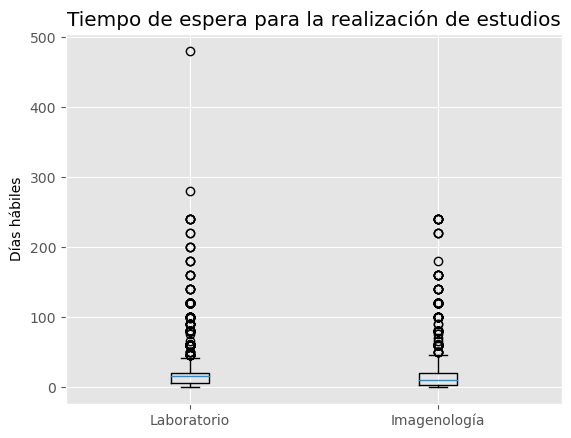

In [14]:
df_temsad1 = df[df['temsad1']<996]
df_temsad2 = df[df['temsad2']<996]
plt.boxplot([df_temsad1['temsad1'], df_temsad2['temsad2']], labels=['Laboratorio', 'Imagenología'])
plt.title('Tiempo de espera para la realización de estudios')
plt.ylabel('Días hábiles')
plt.show()

## Otros lugares donde los pacientes acuden por atención médica

Casi la mitad de las personas que acudieron a consulta a un lugar distinto al IMSS refieren que recibieron una mejor atención en dicho lugar, que el 85% de las veces es un médico privado o consultorios de farmacias particulares.

In [15]:
otro_servicio = df[(df['otroserv']!='998')&(df['otroserv']!='999')]
otro_servicio['otroserv']=otro_servicio['otroserv'].replace([' ','1','2','3','4','5','6','7','8','9'],[None,'ISSSTE','Centro de salud','Seguro Popular','Consultorios de farmacias particulares','Médico privado','Militar','Cruz Roja','Hospital General','Hospital Civil'])
(otro_servicio['otroserv'].value_counts(normalize=True)*100).to_frame()

,otroserv
Médico privado,56.343104
Consultorios de farmacias particulares,29.865449
Centro de salud,7.304181
Seguro Popular,3.051418
ISSSTE,2.498799
Hospital General,0.336377
Cruz Roja,0.264296
Militar,0.240269
Hospital Civil,0.096108


Text(0.5, 1.0, 'Dónde considera el paciente que recibió mejor atención médica')

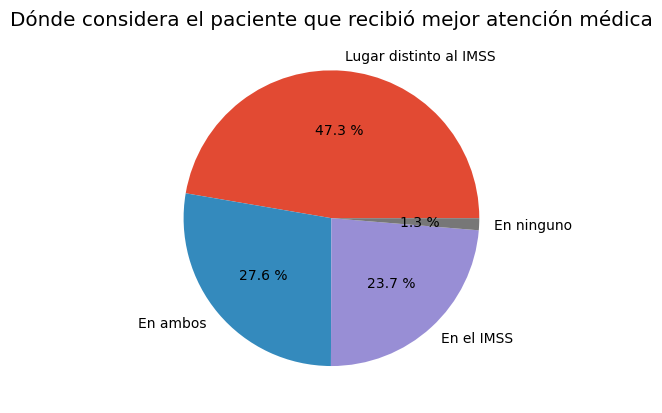

In [16]:
df['mej_serv']=df['mej_serv'].replace(['1','2','3','4','99'],['Lugar distinto al IMSS','En el IMSS','En ambos','En ninguno',None])
y = df.mej_serv.value_counts()
my_labels = ['Lugar distinto al IMSS','En ambos','En el IMSS','En ninguno']
plt.pie(y, labels = my_labels, autopct="%0.1f %%")
plt.style.use('ggplot')
plt.title('Dónde considera el paciente que recibió mejor atención médica')

## Trato del personal a los pacientes

Los tres motivos principales por los cuales las personas refirieron haber recibido una atención regular, mala o pésima, 30% tienen relación con un trato prepotente, 30% con que no recibieron el servicio que necesitaban y 12% con que el paciente no se sintió escuchado. Lo que claramente explica el porqué casi la mitad de las personas prefiere la atención médica en otros lugares (sección anterior)

In [17]:
df['btratou']=df['btratou'].replace([1,2,3,4,5],['Excelente','Bueno','Regular','Malo','Pésimo'])
df.btratou.value_counts()

Bueno        7750
Excelente    3671
Regular       493
Malo          413
Pésimo        203
99             45
Name: btratou, dtype: int64

In [18]:
df['btratou_mot1']=df['btratou_mot1'].replace(['2','3','4','5','6'],['Le hablaron de manera grosera o prepotente', 'No le pusieron atención mientras les hablaba', 'No le proporcionaron el servicio que usted requería', 'No le dieron sus medicamentos', 'Los tiempos de espera eran muy largos'])
((df['btratou_mot1'].value_counts(normalize=True))*100).head(5).to_frame()

,btratou_mot1
Le hablaron de manera grosera o prepotente,30.928765
No le proporcionaron el servicio que usted requería,30.297565
No le pusieron atención mientras les hablaba,12.804328
No le dieron sus medicamentos,8.205591
Los tiempos de espera eran muy largos,6.492335


## Sobre COVID-19 y vacunación

De los contagios de covid por sexo tenemos que en las mujeres hubo un 3% más de incidencia que en la población masculina. De las personas que fueron vacunadas (al menos una dosis) únicamente 35% se contagiaron. La mayoría de la población encuestada cuenta con 3 dosis de vacuna contra COVID-19.

In [19]:
df['sexo']=df['sexo'].replace([1,2],['Mujer','Hombre'])
df['contagio_covid']=df['contagio_covid'].replace([1,2,99],['Si','No',None])
crosstable=pd.crosstab(df['sexo'],df['contagio_covid'])
crosstable

contagio_covid,No,Si
sexo,,
Hombre,2819,1386
Mujer,5389,2927


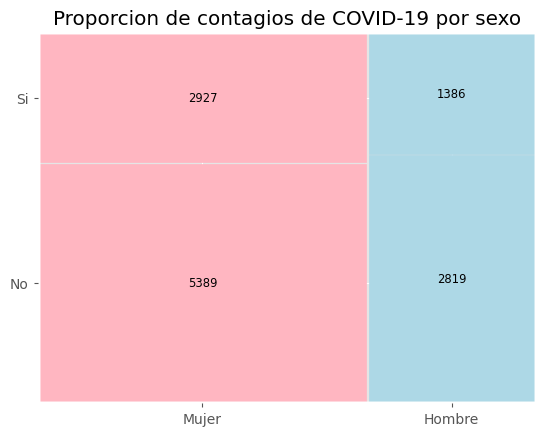

In [21]:
from statsmodels.graphics.mosaicplot import mosaic
labelizer=lambda k:{('Mujer','No'):5389,('Hombre','No'):2819,('Mujer','Si'):2927,('Hombre','Si'):1386}[k]
props = lambda key: {'color': 'lightpink' if 'Mujer' in key else 'lightblue'}
mosaic(df,['sexo','contagio_covid'],labelizer=labelizer,properties=props)
plt.title('Proporcion de contagios de COVID-19 por sexo')
plt.show()

In [22]:
df['vacunados']=df['vacunados'].replace([1,2,99],['Si','No',None])
crosstable=pd.crosstab(df['vacunados'],df['contagio_covid'])
crosstable

contagio_covid,No,Si
vacunados,,
No,459,138
Si,7743,4175


Text(0, 0.5, 'Vacunados')

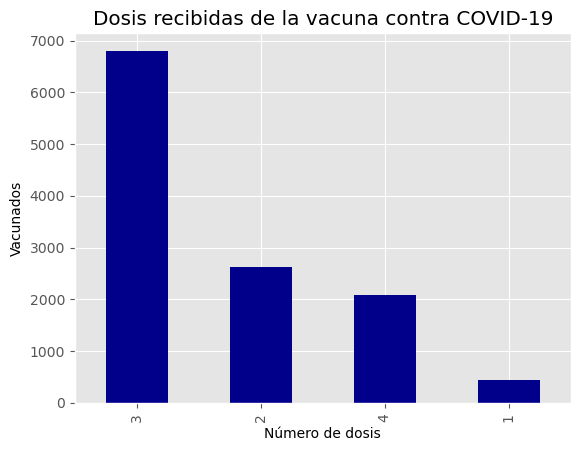

In [25]:
df.numdosis.value_counts().head(4).plot.bar(color='darkblue')
plt.title('Dosis recibidas de la vacuna contra COVID-19')
plt.xlabel('Número de dosis')
plt.ylabel('Vacunados')